# ***CODE DEVELOPMENT AND TESTING NOTEBOOK***
Logan Kelsch created on 1/30/2026

#### Testing initial structure of each transformation function

In [ ]:
%pip install numba
%pip install pandas
%pip install matplotlib
%pip install bottleneck

In [ ]:
import numpy as np
data = np.random.random((20,2))*2-1
'''
data = np.zeros((20,2))
data2 = np.zeros((20,2))
for i in range(data.shape[0]):
    data[i,0]=(i-10)/2
for i in range(data.shape[0]):
    data[i,1]=(i-5)/5
'''

In [ ]:
import transform as _T

x = np.zeros(data.shape, dtype=np.float32)
_T.t_COR(data[:,[0]], data[:,[1]], 20, out=x)

#print(x)``
import matplotlib.pyplot as plt

plt.plot(data[:,0])
plt.plot(x[:,0])
plt.show()

#### Constructing Data Structure for holding data points (MEP-ish structure)

In [ ]:
#import population as _P

#gene = _P.gene()
#gene.exp = 'F1fdsaklfd'

#print(gene.exp)

In [ ]:
import pandas as pd
import numpy as np

import transform as _T
import initialization as _I
import visualization as _V
from importlib import reload

reload(_I)

x_raw = pd.read_csv('../data/spy5m.csv')

#creating initial population
X = _I.Population(
    X_inst=x_raw.values, 
    terminal_idx=[1,2,3,4],
    excluded_idx=[0],
    max_size=1005
)

grammar = _I.Grammar('None', max_delta_lookback=240)

#print(f'initial L and G size: {X._L_idx}, {X._G_idx}')

inst_inst = _I.generate_instructions(X, grammar, 1000, 100)

In [ ]:
reload(_I)
ft = _I.family_tree_indices(X._instructions, [100, 200, 300, 400])
print(ft, 'length:', len(ft))
flush_mapping = _I.flush_population(X, ft)
print(X._instructions[:10])

In [ ]:
#this output is in number order showing that the instruction space is fully condensed
print(np.unique(flush_mapping))
print(flush_mapping[:10])

In [ ]:
_V.plot_flags(X._instructions)
#format for instructions [pop_idx, func_id, USED_FLAGS, CONST_FLAGS, SENSOR_FLAGS, x, a, d, dd, k]

_V.plot_instruction_demo(X._instructions)

#### Constructing Instantiation Functionality

In [ ]:
import initialization as _I
import pandas as pd

x_raw = pd.read_csv('../data/spy5m.csv')

#creating initial population
X = _I.Population(
    X_inst=x_raw.values, 
    terminal_idx=[1,2,3,4],
    excluded_idx=[0],
    max_size=1005
)
grammar = _I.Grammar('None', max_delta_lookback=240)

_I.generate_instructions(X, grammar, 1000, 100)

In [ ]:
from importlib import reload
reload(_I)

n = 5000
vals = 3
tot_ops = np.zeros(int(n/10))

for i in range(10, n, 10):

    loc_ops = 0
    for j in range(vals):
        X = _I.Population(
            X_inst=x_raw.values, 
            terminal_idx=[1,2,3,4],
            excluded_idx=[0],
            max_size=10005
        )
        _I.generate_instructions(X, grammar, 10000, i)
        ops = _I.build_operation_list(X._instructions)
        loc_ops += len(ops)

    if(i%100==0):
        print(i)

    #print(i, loc_ops)
        
    tot_ops[int(i/10)-1] = loc_ops/vals

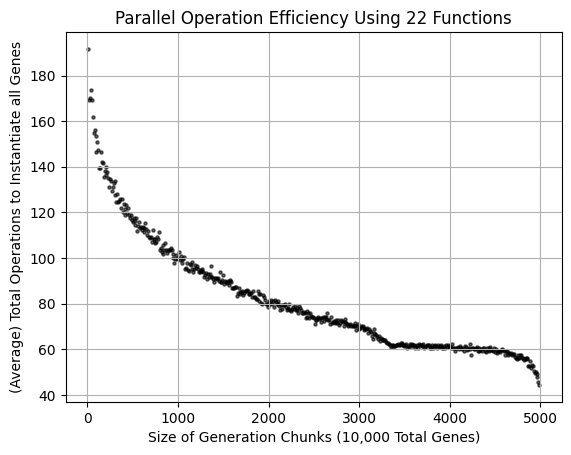

In [71]:
import matplotlib.pyplot as plt

to = tot_ops[:-1]
plt.scatter(range(10, n, 10),to, c='black',alpha=0.6, s=5)
plt.xlabel('Size of Generation Chunks (10,000 Total Genes)')
plt.ylabel('(Average) Total Operations to Instantiate all Genes')
plt.title('Parallel Operation Efficiency Using 22 Functions')
plt.grid()
plt.show()